## Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data


In [ ]:
df = pd.read_csv("/content/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Data Cleaning


### Handling Missing values

In [ ]:
## Check Null Values
##Check features with nan value
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


### Dealing with Duplicates

Check if there are duplicates in the dataset:

In [ ]:

#check if there are duplicates in the dataset:
df.duplicated().sum()



1

In [ ]:
#drop the duplicates:
df.drop_duplicates(inplace=True)


## Data Analysis

In [ ]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df['sex'].value_counts()

,count
sex,
male,675
female,662


In [ ]:
df['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [ ]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


#### Univariate Visualization

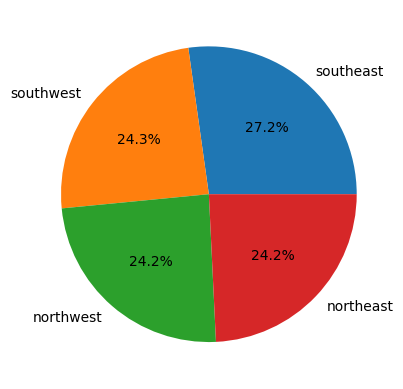

In [ ]:
region_counts = df['region'].value_counts()

plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.show()

<Axes: xlabel='smoker', ylabel='count'>

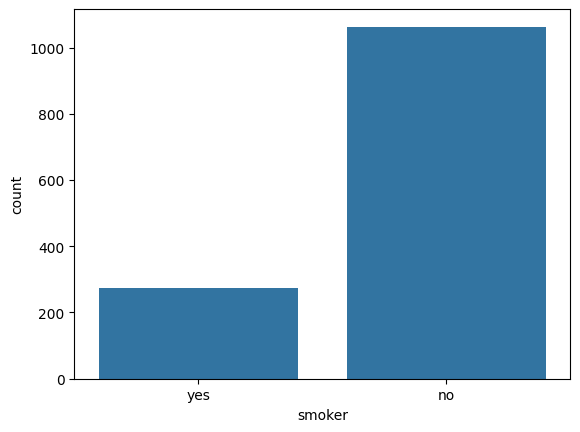

In [ ]:
sns.countplot(x='smoker', data=df)

#### Correlation

In [ ]:
corr = df.corr(numeric_only=True)
corr

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


<Axes: >

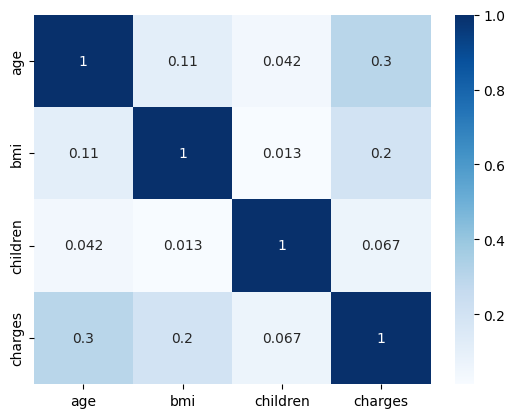

In [ ]:
sns.heatmap(corr, annot=True, cmap='Blues')

#### Bivariate Visualization

## Feature Encoding and Scaling


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Encoding categorical feature

In [ ]:
df['sex'].replace({'male':1,'female':0}, inplace=True)
df['smoker'].replace({'yes':1,'no':0}, inplace=True)
df['region'].replace({'southeast':0,'southwest':1,'northwest':2,'northeast':3}, inplace=True)


<ipython-input-23-37f0ca1c49cd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].replace({'male':1,'female':0}, inplace=True)
<ipython-input-23-37f0ca1c49cd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'].replace({'male':1,'female':0}, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])

le=LabelEncoder()
df['smoker']=le.fit_transform(df['smoker'])

le=LabelEncoder()
df['region']=le.fit_transform(df['region'])

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
## Indpendent and dependent features
X = df.drop(['charges'], axis=1)
y = df['charges']


In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1069, 6), (268, 6))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model Training And Model Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    r2_square = r2_score(true, predicted)
    return mae, r2_square

In [ ]:
## Beginning Model Training
models = [LinearRegression(), KNeighborsRegressor() , DecisionTreeRegressor(),RandomForestRegressor() ]


for model in models:
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(type(model).__name__)

    print('Model performance for Training set')
    print("- Mean Absolute Error:" ,model_train_mae)
    print("- R2 Score:", model_train_r2)

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Mean Absolute Error:" ,model_test_mae)
    print("- R2 Score:", model_test_r2)

    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Mean Absolute Error: 4181.321578104918
- R2 Score: 0.7297182858804965
----------------------------------
Model performance for Test set
- Mean Absolute Error: 4182.3531552883
- R2 Score: 0.8068466322629111


KNeighborsRegressor
Model performance for Training set
- Mean Absolute Error: 2640.115627221702
- R2 Score: 0.8586464985217084
----------------------------------
Model performance for Test set
- Mean Absolute Error: 3102.3946927873135
- R2 Score: 0.8645295403218781


DecisionTreeRegressor
Model performance for Training set
- Mean Absolute Error: 0.0
- R2 Score: 1.0
----------------------------------
Model performance for Test set
- Mean Absolute Error: 3012.996277608209
- R2 Score: 0.7749833121230976


RandomForestRegressor
Model performance for Training set
- Mean Absolute Error: 1036.1900212542564
- R2 Score: 0.9747102543442256
----------------------------------
Model performance for Test set
- Mean Absolute Error: 2582.788239

In [ ]:
#Initialize few parameter for Hyperparamter tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}


In [ ]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator=RandomForestRegressor(),
                                   param_distributions=rf_params,
                                   n_iter=20,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
random.fit(X_train, y_train)

print(f"---------------- Best Params -------------------")
print(random.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

---------------- Best Params -------------------
{'n_estimators': 200, 'min_samples_split': 15, 'max_features': 5, 'max_depth': 5}


In [ ]:
model = RandomForestRegressor(n_estimators= 200, min_samples_split= 15, max_features= 5, max_depth = 5)
model.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Train and Test dataset
model_train_mae , model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae , model_test_r2 = evaluate_model(y_test, y_test_pred)


print(type(model).__name__)

print('Model performance for Training set')
print("- Mean Absolute Error:" ,model_train_mae)
print("- R2 Score:", model_train_r2)

print('----------------------------------')

print('Model performance for Test set')
print("- Mean Absolute Error:" ,model_test_mae)
print("- R2 Score:", model_test_r2)

print('='*35)
print('\n')

RandomForestRegressor
Model performance for Training set
- Mean Absolute Error: 2288.136812281008
- R2 Score: 0.8758419292106281
----------------------------------
Model performance for Test set
- Mean Absolute Error: 2435.529449767769
- R2 Score: 0.9026200598808493


